# Thinking probabilistically-- Discrete variables

Probabilistic reasoning allows us to describe uncertainty. Given a set of data, you describe probabilistically what you might expect if those data were acquired again and again and again.

Instead of repeating the data acquisition over and over again we can simulate those repeated measurements using Python.

## Random number generators and hacker statistics

### Generating random numbers using the np.random module

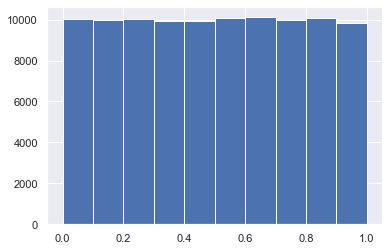

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(len(random_numbers)):
    random_numbers[i] = np.random.random()
sns.set()
_ = plt.hist(random_numbers)
plt.show()

### The np.random module and Bernoulli trials


In [21]:
def perform_bernoulli_trials(n, p):
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

### How many defaults might we expect?

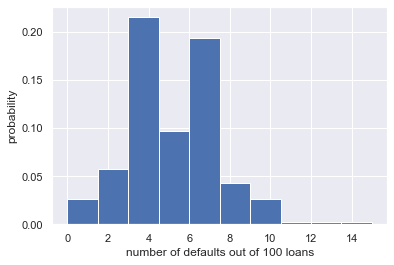

In [27]:
np.random.seed(42)
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
_ = plt.hist(n_defaults, density=True) # used to be normalize = True
_ = plt.xlabel("number of defaults out of 100 loans")
_ = plt.ylabel("probability")
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. 

### Will the bank fail?

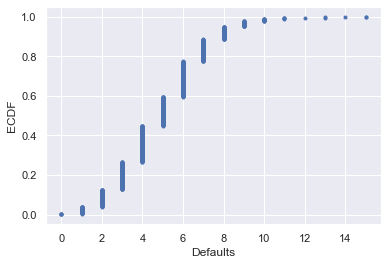

Probability of losing money = 0.022


In [30]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(n_defaults)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Defaults")
plt.ylabel("ECDF")
plt.show()

n_lose_money = np.sum(n_defaults >= 10)
print("Probability of losing money =", n_lose_money / len(n_defaults))

## Probability distributions and stories: The Binomial distribution

A PMF is defined as the set of probabilities of discrete outcomes.

### Sampling out of the Binomial distribution

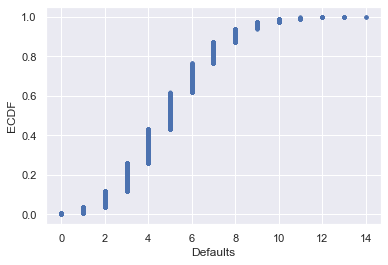

In [31]:
n_defaults = np.random.binomial(100, 0.05, size=10000)
x, y = ecdf(n_defaults)
plt.plot(x,y,marker=".", linestyle="none")
plt.xlabel("Defaults")
plt.ylabel("ECDF")
plt.show()

### Plotting the Binomial PMF

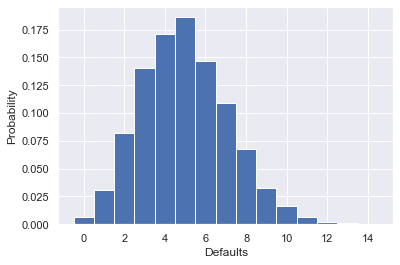

In [33]:
bins = np.arange(0, max(n_defaults)+1.5)-0.5
plt.hist(n_defaults, bins =bins, density=True)
plt.xlabel("Defaults")
plt.ylabel("Probability")
plt.show()

## Poisson processes and the Poisson distribution

Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials for rare events.

### Relationship between Binomial and Poisson distributions

In [37]:
samples_poisson = np.random.poisson(10, 10000)
print("Poisson:", np.mean(samples_poisson), np.std(samples_poisson))
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=100000)
    print("n =", n[i], "Binom:", np.mean(samples_binomial), np.std(samples_binomial))

Poisson: 9.9898 3.1450112813788125
n = 20 Binom: 10.00923 2.2417726930043558
n = 100 Binom: 9.98863 2.9934329327880387
n = 1000 Binom: 10.00257 3.139051352733816


 The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

### Was 2015 anomalous?

In [41]:
n_nohitters = np.random.poisson(251/115, 10000)
n_large = np.sum(n_nohitters >= 7)
p_large = n_large / 10000
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067
